# **RSI & EMA based Trading Strategy Backtesting for Indo Thai Securities (August 2024 - July 2025)**




This project simulates a technical trading strategy using EMA and RSI indicators on the stock **INDOTHAI.NS**. We compare multiple strategies, analyze performance, and fine-tune parameters to achieve better results.

## **Introduction**

This project evaluates multiple trading strategies for Indo Thai Securities, including:

- **Buy & Hold**
- **EMA-based strategies (10, 20, 50, 100)**
- **RSI-based strategy**
- **RSI+EMA hybrid strategies (50 and 100-day spans)**
  
The goal is to compare strategies based on performance metrics such as **Final Return (%)**, **Maximum drawdown**, **Sharpe Ratio**, and **Win/Loss percentages**.

We also perform **parametric tuning** to optimize the RSI window and thresholds.

In [1]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [3]:
import os

os.makedirs("images", exist_ok = True)

## **Data Import & Pre-processing**

- Collected 1 year of daily price data using 'yfinance'
- Focussed on **INDOTHAI.NS** for analysis
- Extracted Open, High, Low, Close & Volume

In [4]:
ticker = 'INDOTHAI.NS'
start_date = '2024-08-01'
end_date = '2025-07-31'

In [5]:
df = yf.download(ticker, start=start_date, end=end_date)

C:\Users\SHREYA PAI\AppData\Local\Temp\ipykernel_8516\3775142440.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


## **Calculating Returns & Technical Indicators (EMA, RSI)**

### **Daily Returns**

In [6]:
df[('Returns', 'INDOTHAI.NS')] = df[('Close', 'INDOTHAI.NS')].pct_change()

### **10-day EMA**

In [7]:
df[('EMA_10', 'INDOTHAI.NS')]=df[('Close', 'INDOTHAI.NS')].ewm(span=10, adjust=False).mean()

### **20-day EMA**

In [8]:
df[('EMA_20', 'INDOTHAI.NS')]=df[('Close', 'INDOTHAI.NS')].ewm(span=20, adjust=False).mean()

### **50-day EMA**

In [9]:
df[('EMA_50', 'INDOTHAI.NS')]=df[('Close', 'INDOTHAI.NS')].ewm(span=50, adjust=False).mean()

### **100-day EMA**

In [10]:
df[('EMA_100', 'INDOTHAI.NS')]=df[('Close', 'INDOTHAI.NS')].ewm(span=100, adjust=False).mean()

**Calculating strategies**

Strategy logic:

- Buy if Price > EMA
- Sell if Price < EMA

In [11]:
signal_0 = pd.Series(0, index=df.index)
signal_0[df[('Close', 'INDOTHAI.NS')]>df[('EMA_10', 'INDOTHAI.NS')]]=1
shifted_signal_0 = signal_0.shift(1) 
df[('signal_0', 'INDOTHAI.NS')] = shifted_signal_0
df.dropna(subset=[('signal_0', 'INDOTHAI.NS')], inplace=True)
df[('Strategy_0', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('signal_0', 'INDOTHAI.NS')]

In [12]:
signal_1 = pd.Series(0, index=df.index)
signal_1[df[('Close', 'INDOTHAI.NS')]>df[('EMA_20', 'INDOTHAI.NS')]]=1
shifted_signal_1 = signal_1.shift(1) 
df[('signal_1', 'INDOTHAI.NS')] = shifted_signal_1
df.dropna(subset=[('signal_1', 'INDOTHAI.NS')], inplace=True)
df[('Strategy_1', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('signal_1', 'INDOTHAI.NS')]

In [13]:
signal_2 = pd.Series(0, index=df.index)
signal_2[df[('Close', 'INDOTHAI.NS')]>df[('EMA_50', 'INDOTHAI.NS')]]=1
shifted_signal_2 = signal_2.shift(1) 
df[('signal_2', 'INDOTHAI.NS')] = shifted_signal_2
df.dropna(subset=[('signal_2', 'INDOTHAI.NS')], inplace=True)
df[('Strategy_2', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('signal_2', 'INDOTHAI.NS')]

In [14]:
signal_3 = pd.Series(0, index=df.index)
signal_3[df[('Close', 'INDOTHAI.NS')]>df[('EMA_100', 'INDOTHAI.NS')]]=1
shifted_signal_3 = signal_2.shift(1) 
df[('signal_3', 'INDOTHAI.NS')] = shifted_signal_3
df.dropna(subset=[('signal_3', 'INDOTHAI.NS')], inplace=True)
df[('Strategy_3', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('signal_3', 'INDOTHAI.NS')]

In [15]:
cum_buy_hold = (df[('Returns', 'INDOTHAI.NS')]+1).cumprod()
cum_strategy_0 = (df[('Strategy_0', 'INDOTHAI.NS')]+1).cumprod()
cum_strategy_1 = (df[('Strategy_1', 'INDOTHAI.NS')]+1).cumprod()
cum_strategy_2 = (df[('Strategy_2', 'INDOTHAI.NS')]+1).cumprod()
cum_strategy_3 = (df[('Strategy_3', 'INDOTHAI.NS')]+1).cumprod()

### **Visualization**

- Buy & Hold vs. EMA (10, 20, 50, 100-day spans)

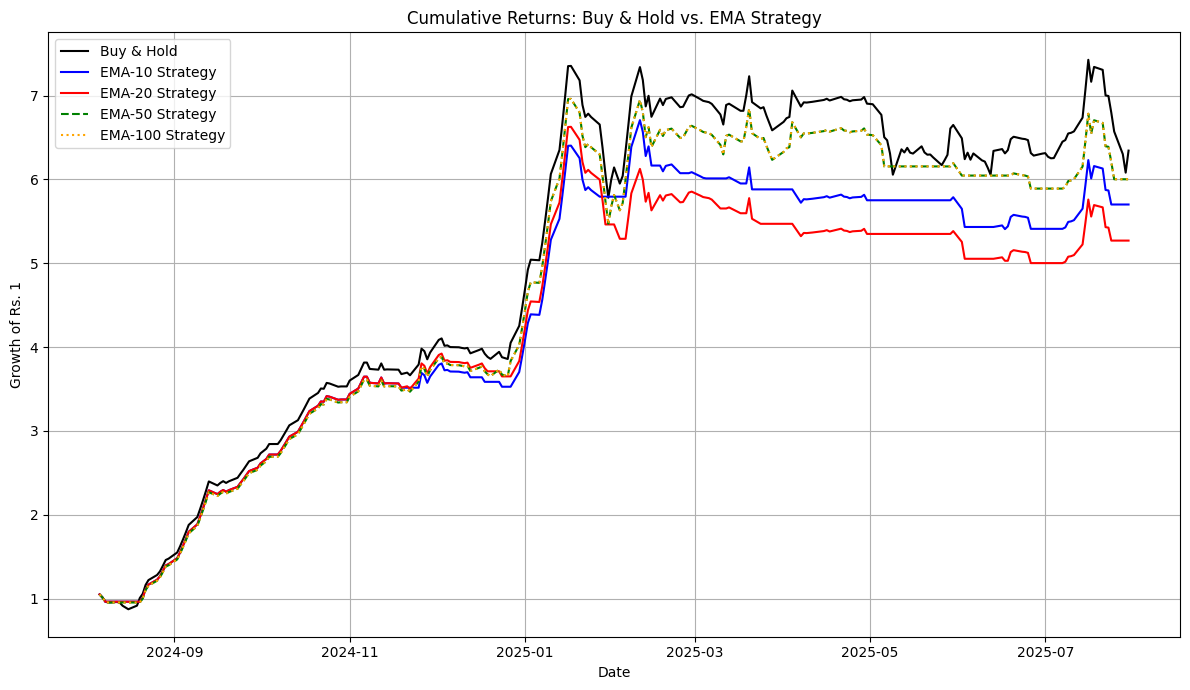

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(cum_buy_hold, label='Buy & Hold', color='black', linewidth=1.5)
plt.plot(cum_strategy_0, label='EMA-10 Strategy', color='blue', linewidth=1.5)
plt.plot(cum_strategy_1, label='EMA-20 Strategy', color='red', linewidth=1.5)
plt.plot(cum_strategy_2, label='EMA-50 Strategy', color='green', linewidth=1.5, linestyle="--")
plt.plot(cum_strategy_3, label='EMA-100 Strategy', color='orange', linewidth=1.5, linestyle=":")
plt.title('Cumulative Returns: Buy & Hold vs. EMA Strategy')
plt.xlabel('Date')
plt.ylabel('Growth of Rs. 1')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("images/cumulative_returns_EMA.png", dpi=300, bbox_inches='tight')
plt.close()

### **Performance Evaluation**

In [17]:
rolling_max_bh = cum_buy_hold.cummax()
drawdown_bh = (cum_buy_hold - rolling_max_bh) / rolling_max_bh
max_drawdown_bh = drawdown_bh.min()*100

final_value = cum_buy_hold.iloc[-1]
final_value_pct = (final_value -1)*100

strategy_returns_bh = df[('Returns', 'INDOTHAI.NS')].dropna()
sharpe_ratio_bh = strategy_returns_bh.mean() / strategy_returns_bh.std()
sharpe_ratio_annualized_bh = sharpe_ratio_bh*(252**0.5)

total_days_bh = len(strategy_returns_bh)
win_days_bh = (strategy_returns_bh > 0).sum()
loss_days_bh = (strategy_returns_bh < 0).sum()
flat_days_bh = (strategy_returns_bh == 0).sum()
win_pct_bh = (win_days_bh / total_days_bh) * 100
loss_pct_bh = (loss_days_bh / total_days_bh) * 100

In [18]:
rolling_max_10 = cum_strategy_0.cummax()
drawdown_10 = (cum_strategy_0 - rolling_max_10) / rolling_max_10
max_drawdown_10 = drawdown_10.min()*100

final_value_cum_0 = cum_strategy_0.iloc[-1]
final_value__cum_0_pct = (final_value_cum_0 -1)*100

strategy_returns_10 = df[('Strategy_0', 'INDOTHAI.NS')].dropna()
sharpe_ratio_10 = strategy_returns_10.mean() / strategy_returns_10.std()
sharpe_ratio_annualized_10 = sharpe_ratio_10*(252**0.5)

total_days_10 = len(strategy_returns_10)
win_days_10 = (strategy_returns_10 > 0).sum()
loss_days_10 = (strategy_returns_10 < 0).sum()
flat_days_10 = (strategy_returns_10 == 0).sum()
win_pct_10 = (win_days_10 / total_days_10) * 100
loss_pct_10 = (loss_days_10 / total_days_10) * 100

In [19]:
rolling_max_20 = cum_strategy_1.cummax()
drawdown_20 = (cum_strategy_1 - rolling_max_20) / rolling_max_20
max_drawdown_20 = drawdown_20.min()*100

final_value_cum_1 = cum_strategy_1.iloc[-1]
final_value__cum_1_pct = (final_value_cum_1 -1)*100

strategy_returns_20 = df[('Strategy_1', 'INDOTHAI.NS')].dropna()
sharpe_ratio_20 = strategy_returns_20.mean() / strategy_returns_20.std()
sharpe_ratio_annualized_20 = sharpe_ratio_20*(252**0.5)

total_days_20 = len(strategy_returns_20)
win_days_20 = (strategy_returns_20 > 0).sum()
loss_days_20 = (strategy_returns_20 < 0).sum()
flat_days_20 = (strategy_returns_20 == 0).sum()
win_pct_20 = (win_days_20 / total_days_20) * 100
loss_pct_20 = (loss_days_20 / total_days_20) * 100

In [20]:
rolling_max_50 = cum_strategy_2.cummax()
drawdown_50 = (cum_strategy_2 - rolling_max_50) / rolling_max_50
max_drawdown_50 = drawdown_50.min()*100

final_value_cum_2 = cum_strategy_2.iloc[-1]
final_value__cum_2_pct = (final_value_cum_2 -1)*100

strategy_returns_50 = df[('Strategy_2', 'INDOTHAI.NS')].dropna()
sharpe_ratio_50 = strategy_returns_50.mean() / strategy_returns_50.std()
sharpe_ratio_annualized_50 = sharpe_ratio_50*(252**0.5)

total_days_50 = len(strategy_returns_50)
win_days_50 = (strategy_returns_50 > 0).sum()
loss_days_50 = (strategy_returns_50 < 0).sum()
flat_days_50 = (strategy_returns_50 == 0).sum()
win_pct_50 = (win_days_50 / total_days_50) * 100
loss_pct_50 = (loss_days_50 / total_days_50) * 100

In [21]:
rolling_max_100 = cum_strategy_3.cummax()
drawdown_100 = (cum_strategy_3 - rolling_max_100) / rolling_max_100
max_drawdown_100 = drawdown_100.min()*100

final_value_cum_3 = cum_strategy_3.iloc[-1]
final_value__cum_3_pct = (final_value_cum_3 -1)*100

strategy_returns_100 = df[('Strategy_3', 'INDOTHAI.NS')].dropna()
sharpe_ratio_100 = strategy_returns_100.mean() / strategy_returns_100.std()
sharpe_ratio_annualized_100 = sharpe_ratio_100*(252**0.5)

total_days_100 = len(strategy_returns_100)
win_days_100 = (strategy_returns_100 > 0).sum()
loss_days_100 = (strategy_returns_100 < 0).sum()
flat_days_100 = (strategy_returns_100 == 0).sum()
win_pct_100 = (win_days_100 / total_days_100) * 100
loss_pct_100 = (loss_days_100 / total_days_100) * 100

In [22]:
ema_data = {
    "Strategy": ["Buy & Hold", "EMA-10", "EMA-20", "EMA-50", "EMA-100"],
    "Max drawdown (%)": [-21.38, -19.38, -24.53, -21.38, -21.38],
    "Final Returns (%)": [534.33, 470.05, 427.00, 500.17, 500.17],
    "Sharpe ratio": [4.64, 5.24, 4.74, 4.96, 4.96],
    "Win days": [141, 103, 109, 120, 120],
    "Loss days": [101, 57, 66, 76, 76],
    "Flat days": [4, 86, 71, 50, 50],
    "Win %": [57.32, 41.87, 44.31, 48.78, 48.78],
    "Loss %": [41.06, 23.17, 26.83, 30.89, 30.89]
}

ema_df = pd.DataFrame(ema_data)

ema_df

,Strategy,Max drawdown (%),Final Returns (%),Sharpe ratio,Win days,Loss days,Flat days,Win %,Loss %
0,Buy & Hold,-21.38,534.33,4.64,141,101,4,57.32,41.06
1,EMA-10,-19.38,470.05,5.24,103,57,86,41.87,23.17
2,EMA-20,-24.53,427.00,4.74,109,66,71,44.31,26.83
3,EMA-50,-21.38,500.17,4.96,120,76,50,48.78,30.89
4,EMA-100,-21.38,500.17,4.96,120,76,50,48.78,30.89


### **Observations - Buy & Hold vs. EMA strategy**

EMA alone produced moderate returns but lacked strong signals.

1. **Performance:**
   - All EMA strategies achieved Sharpe Ratios comparable to or higher than Buy & Hold **(4.64)**, with EMA-10 achieving the highest at **5.24**.
   - EMA-10's slightly higher Sharpe Ratio suggests better risk-adjusted returns comparable to Buy & Hold.
<br><br>
2. **Drawdown behaviour:**
   - EMA-10 had the lowest maximum drawdown **(-19.38%)**, indicating better downside protection compared to all other EMA periods and Buy & Hold.
   - EMA-20 experienced the largest drawdown **(-24.53%)**, suggesting weaker drawdown control for this period length.
<br><br>
3. **Win/Loss profile:**
   - Win percentage improved with longer EMAs, peaking at **48.78%** for EMA-50 and EMA-100, compared to **41.87%** for EMA-10.
   - However, longer EMAs resulted in fewer trades (more flat days), indicating a slower reaction to price changes.
<br><br>
4. **Overlap in EMA-50 & EMA-100:**
   - EMA-50 and EMA-100 produced identical metrics and trade counts, indicating near-complete overlap in strategy signals for this dataset.
   - This suggests diminishing incremental benefit in extending the EMA period beyond 50 in this context.
<br><br>
5. **Trade-off insights:**
   - Shorter EMAs (like EMA-10) react faster to price changes, capture short-term movements, and offer better drawdown control.
   - Longer EMAs (like EMA-50, EMA-100) generate fewer trades, have steadier win rates, but are slower to respond to sudden market shifts.

### **Calculating RSI**

Used to identify overbought and oversold conditions to generate buy and sell signals.

- Strategy:
  - Buy if RSI < 30
  - Sell if RSI > 70

In [23]:
from ta.momentum import RSIIndicator

In [24]:
rsi = RSIIndicator(close=df[('Close', 'INDOTHAI.NS')], window=14).rsi()
df[('RSI', 'INDOTHAI.NS')] = rsi

In [25]:
rsi_signal = pd.Series(0, index=df.index)
rsi_signal[df[('RSI', 'INDOTHAI.NS')] < 30] = 1
rsi_signal[df[('RSI', 'INDOTHAI.NS')] > 70] = -1
df[('rsi_signal', 'INDOTHAI.NS')] = rsi_signal.shift(1)

In [26]:
df.dropna(subset=[('rsi_signal', 'INDOTHAI.NS')], inplace=True)

In [27]:
df[('RSI_Strategy', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('rsi_signal', 'INDOTHAI.NS')]

In [28]:
cum_rsi = (df[('RSI_Strategy', 'INDOTHAI.NS')] + 1).cumprod()

### **Visualization**

- Buy & Hold vs. RSI

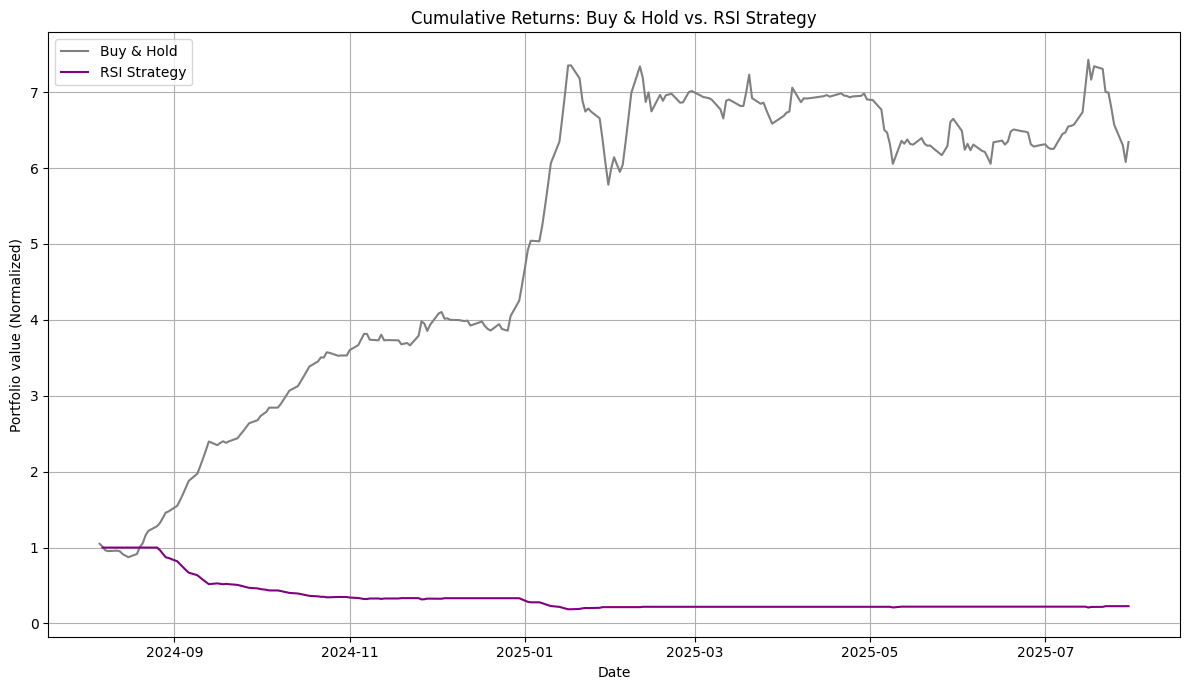

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(cum_buy_hold, label='Buy & Hold', color='grey')
plt.plot(cum_rsi, label='RSI Strategy', color='purple')
plt.title('Cumulative Returns: Buy & Hold vs. RSI Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio value (Normalized)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("images/cumulative_returns_RSI.png", dpi=300, bbox_inches='tight')
plt.close()

### **Performance evaluation**

In [30]:
rolling_max = cum_rsi.cummax()
drawdown = (cum_rsi - rolling_max) / rolling_max
max_drawdown = drawdown.min()*100

final_value_rsi = cum_rsi.iloc[-1]
final_value_rsi_pct = (final_value_rsi -1)*100

strategy_returns = df[('RSI_Strategy', 'INDOTHAI.NS')].dropna()
sharpe_ratio = strategy_returns.mean() / strategy_returns.std()
sharpe_ratio_annualized = sharpe_ratio*(252**0.5)

total_days = len(strategy_returns)
win_days = (strategy_returns > 0).sum()
loss_days = (strategy_returns < 0).sum()
flat_days = (strategy_returns == 0).sum()
win_pct = (win_days / total_days) * 100
loss_pct = (loss_days / total_days) * 100

In [31]:
bh_rsi_data = {
    "Strategy": ["Buy & Hold", "RSI"],
    "Max drawdown (%)": [-21.38, -81.25],
    "Final Returns (%)": [534.33, -77.20],
    "Sharpe ratio": [4.64, -5.15],
    "Win days": [141, 25],
    "Loss days": [101, 64],
    "Flat days": [4, 156],
    "Win %": [57.32, 10.20],
    "Loss %": [41.06, 26.12]
}

bh_rsi_df = pd.DataFrame(bh_rsi_data)

bh_rsi_df

,Strategy,Max drawdown (%),Final Returns (%),Sharpe ratio,Win days,Loss days,Flat days,Win %,Loss %
0,Buy & Hold,-21.38,534.33,4.64,141,101,4,57.32,41.06
1,RSI,-81.25,-77.20,-5.15,25,64,156,10.20,26.12


### **Observations - Buy & Hold vs. Simple RSI Strategy**

1. Drawdown risk:
   - Buy & Hold experienced a maximum drawdown of **-21.38%**, whereas the simple RSI strategy suffered a significantly larger drawdown of **-81.25%**.
   - This indicates that the RSI-only strategy exposed the portfolio to far greater downside risk.
<br><br>     
2. Risk-adjusted performance:
   - Buy & Hold achieved a Sharpe ratio of **4.64%**, suggesting strong risk-adjusted returns.
   - The RSI-only strategy had a negative Sharpe ratio **(-5.15%)**, meaning its returns were not only low but also poor relative to the risk taken.
<br><br>
3. Win/Loss days:
   - Buy & Hold: **141** win days **(57.32%)** and 101 loss days **(41.06%)**, showing a clear winning bias.
   - RSI-only: Fewer win days compared to loss days, which dragged the performance down.

In this test, Buy & Hold clearly outperformed the simple RSI strategy in both stability and profitability.

RSI-only would need additional filters or a combination with EMA crossovers to be competitive.

## **RSI + EMA Combined Strategy**


- While visualizing EMA-50 and EMA-100 strategy lines, we observed a significant overlap between the two averages.

- To avoid redundancy and better differentiate their influence, both EMA-50 and EMA-100 are selected for the RSI+EMA combined strategy. This allowed us to assess whether the long-term signal of EMA-100 offered any improvement over EMA-50, despite their close visual proximity.

In [32]:
combined_signal_0 = pd.Series(0, index=df.index)

In [33]:
buy_condition_0 = (df[('rsi_signal', 'INDOTHAI.NS')] < 30) & (df[('Close', 'INDOTHAI.NS')] > df[('EMA_50', 'INDOTHAI.NS')])
combined_signal_0[buy_condition_0] = 1

In [34]:
sell_condition_0 = (df[('rsi_signal', 'INDOTHAI.NS')] > 70) & (df[('Close', 'INDOTHAI.NS')] < df[('EMA_50', 'INDOTHAI.NS')])
combined_signal_0[sell_condition_0] = -1

In [35]:
df[('combined_signal_0', 'INDOTHAI.NS')] = combined_signal_0.shift(1)

In [36]:
df[('Combined_Strategy_Returns_0', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('combined_signal_0', 'INDOTHAI.NS')]

In [37]:
cum_combi_strategy_0 = (df[('Combined_Strategy_Returns_0', 'INDOTHAI.NS')] + 1).cumprod()

### **Visualization**

- Buy & Hold vs. RSI+EMA-50

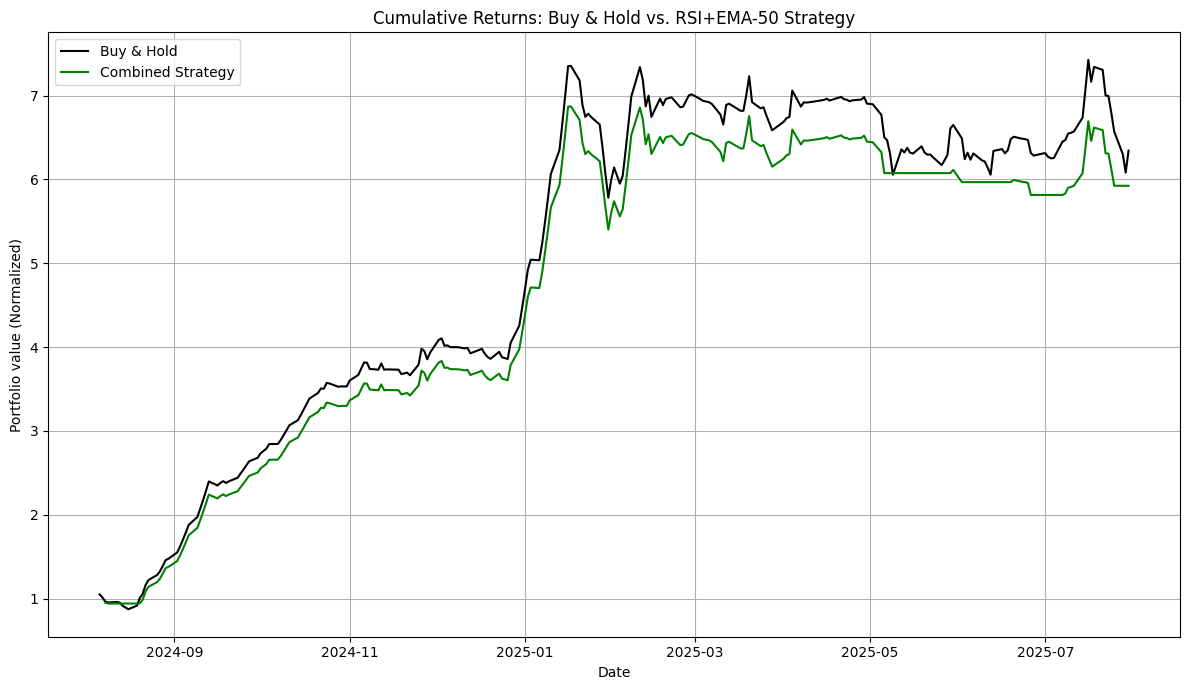

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(cum_buy_hold, label='Buy & Hold', color='black')
plt.plot(cum_combi_strategy_0, label='Combined Strategy', color='green')
plt.title('Cumulative Returns: Buy & Hold vs. RSI+EMA-50 Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio value (Normalized)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("images/cumulative_returns_RSI+EMA_50.png", dpi=300, bbox_inches='tight')
plt.close()

In [39]:
combined_signal_1 = pd.Series(0, index=df.index)

In [40]:
buy_condition_1 = (df[('rsi_signal', 'INDOTHAI.NS')] < 30) & (df[('Close', 'INDOTHAI.NS')] > df[('EMA_100', 'INDOTHAI.NS')])
combined_signal_1[buy_condition_1] = 1

In [41]:
sell_condition_1 = (df[('rsi_signal', 'INDOTHAI.NS')] > 70) & (df[('Close', 'INDOTHAI.NS')] < df[('EMA_100', 'INDOTHAI.NS')])
combined_signal_1[sell_condition_1] = -1

In [42]:
df[('combined_signal_1', 'INDOTHAI.NS')] = combined_signal_1.shift(1)

In [43]:
df[('Combined_Strategy_Returns_1', 'INDOTHAI.NS')] = df[('Returns', 'INDOTHAI.NS')]*df[('combined_signal_1', 'INDOTHAI.NS')]

In [44]:
cum_combi_strategy_1 = (df[('Combined_Strategy_Returns_1', 'INDOTHAI.NS')] + 1).cumprod()

### **Visualization**

- Buy & Hold vs. RSI+EMA-100

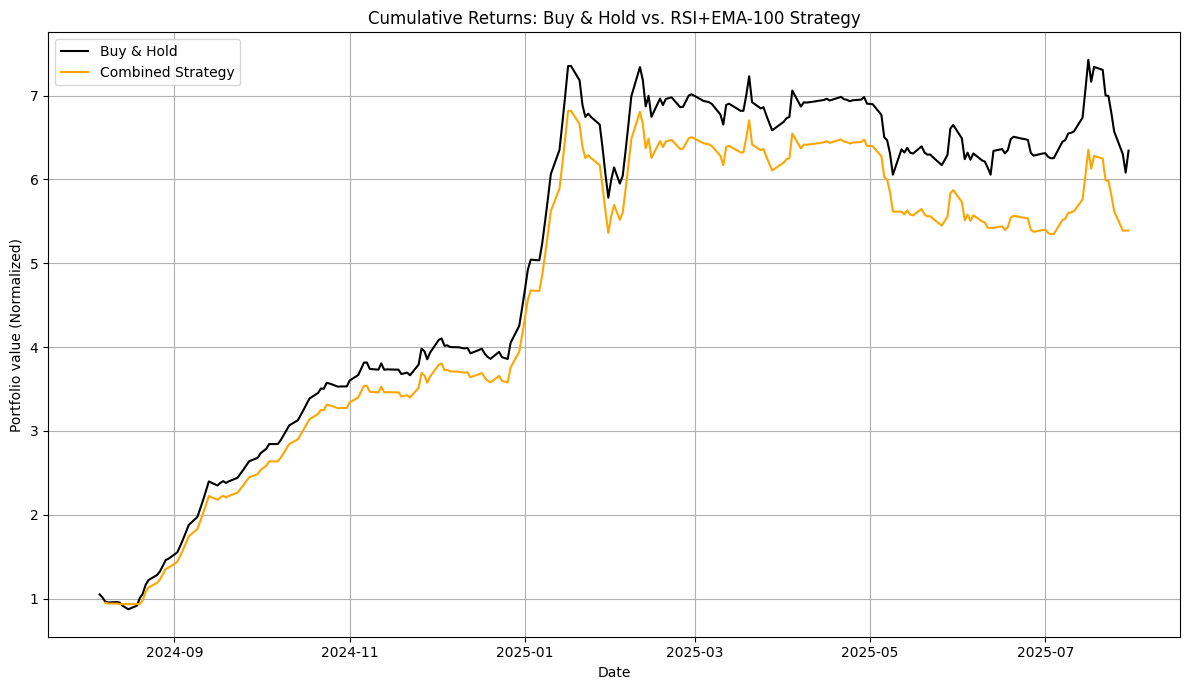

In [45]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(cum_buy_hold, label='Buy & Hold', color='black')
plt.plot(cum_combi_strategy_1, label='Combined Strategy', color='orange')
plt.title('Cumulative Returns: Buy & Hold vs. RSI+EMA-100 Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio value (Normalized)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("images/cumulative_returns_RSI+EMA_100.png", dpi=300, bbox_inches='tight')
plt.close()

### **Performance Evaluation**

In [46]:
final_value_0 = cum_combi_strategy_0.iloc[-1]
final_return_pct_0 = (final_value_0 - 1) * 100

rolling_max_0 = cum_combi_strategy_0.cummax()
drawdown_0 = (cum_combi_strategy_0 - rolling_max_0) / rolling_max_0
max_drawdown_0 = drawdown_0.min() * 100

strategy_returns_0 = df[('Combined_Strategy_Returns_0', 'INDOTHAI.NS')].dropna()
sharpe_ratio_0 = strategy_returns_0.mean() / strategy_returns_0.std()
sharpe_ratio_annualized_0 = sharpe_ratio_0*(252**0.5)

total_days_0 = len(strategy_returns_0)
win_days_0 = (strategy_returns_0 > 0).sum()
loss_days_0 = (strategy_returns_0 < 0).sum()
flat_days_0 = (strategy_returns_0 == 0).sum()
win_pct_0 = (win_days_0 / total_days_0) * 100
loss_pct_0 = (loss_days_0 / total_days_0) * 100

In [47]:
final_value_1 = cum_combi_strategy_1.iloc[-1]
final_return_pct_1 = (final_value_1 - 1)*100

rolling_max_1 = cum_combi_strategy_1.cummax()
drawdown_1 = (cum_combi_strategy_1 - rolling_max_1) / rolling_max_1
max_drawdown_1 = drawdown_1.min()*100

strategy_returns_1 = df[('Combined_Strategy_Returns_1', 'INDOTHAI.NS')].dropna()
sharpe_ratio_1 = strategy_returns_1.mean() / strategy_returns_1.std()
sharpe_ratio_annualized_1 = sharpe_ratio_1*(252**0.5)

total_days_1 = len(strategy_returns_1)
win_days_1 = (strategy_returns_1 > 0).sum()
loss_days_1 = (strategy_returns_1 < 0).sum()
flat_days_1 = (strategy_returns_1 == 0).sum()
win_pct_1 = (win_days_1 / total_days_1) * 100
loss_pct_1 = (loss_days_1 / total_days_1) * 100

In [48]:
rsi_ema_data = {
    "Strategy": ["Buy & Hold", "RSI+EMA-50", "RSI+EMA-100"],
    "Max drawdown (%)": [-21.38, -21.38, -21.59],
    "Final returns (%)": [534.33, 492.39, 438.93],
    "Sharpe ratio": [4.64, 5.01, 4.57],
    "Win days": [141, 119, 134],
    "Loss days": [101, 75, 96],
    "Flat days": [4, 50, 14],
    "Win %": [57.32, 48.77, 54.92],
    "Loss %": [41.06, 30.74, 39.34]
}

rsi_ema_df = pd.DataFrame(rsi_ema_data)

rsi_ema_df

,Strategy,Max drawdown (%),Final returns (%),Sharpe ratio,Win days,Loss days,Flat days,Win %,Loss %
0,Buy & Hold,-21.38,534.33,4.64,141,101,4,57.32,41.06
1,RSI+EMA-50,-21.38,492.39,5.01,119,75,50,48.77,30.74
2,RSI+EMA-100,-21.59,438.93,4.57,134,96,14,54.92,39.34


In [49]:
strategies = ['Buy & Hold', 'RSI+EMA-50', 'RSI+EMA-100']
final_returns = [534.33, 492.39, 438.93]
win_rate = [57.32, 48.77, 54.92]

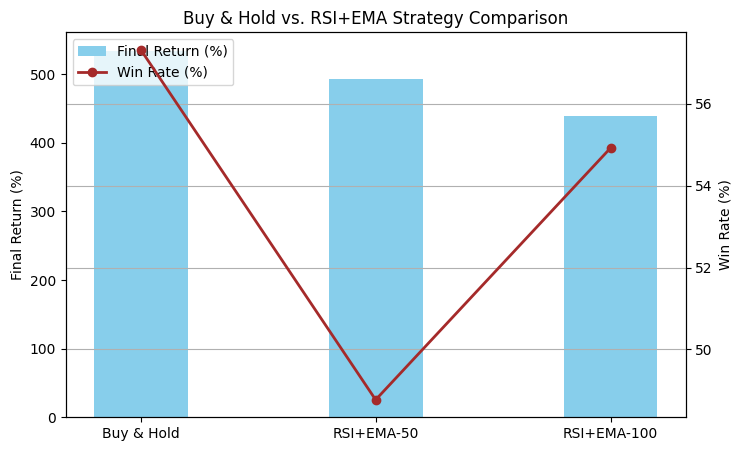

In [50]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.bar(strategies, final_returns, color = 'skyblue', width=0.4, label='Final Return (%)')
ax2.plot(strategies, win_rate, color = 'brown', marker='o', linewidth=2, label='Win Rate (%)')

ax1.set_ylabel('Final Return (%)', color='black')
ax2.set_ylabel('Win Rate (%)', color='black')
plt.title('Buy & Hold vs. RSI+EMA Strategy Comparison')
plt.grid()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

fig.savefig("images/RSI_EMA_compare.png", dpi=300, bbox_inches='tight')
plt.close()

In [51]:
strategies = ['Buy & Hold', 'RSI+EMA-50', 'RSI+EMA-100']
sharpe_ratios = [4.64, 5.01, 4.57]
max_drawdowns = [-21.38, -21.38, -21.59]
final_returns = [534.33, 492.39, 438.93]

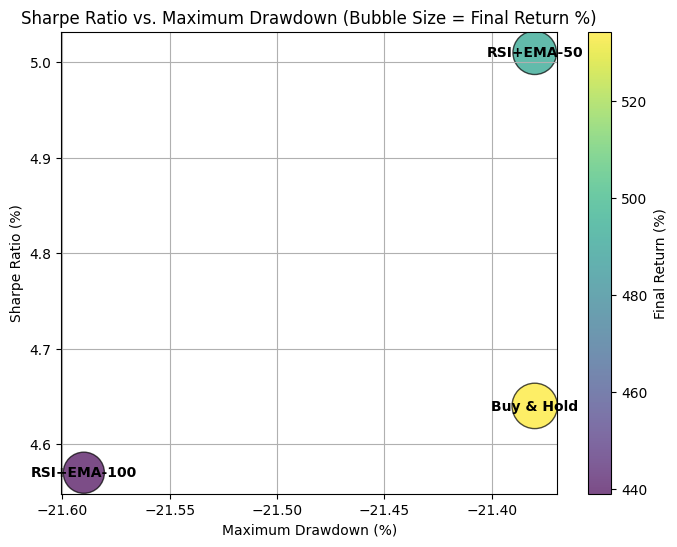

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = plt.scatter(max_drawdowns, sharpe_ratios,
                     s=[r*2 for r in final_returns],
                     c=final_returns,
                     cmap='viridis', alpha=0.7, edgecolors='black')

for i, strategy in enumerate (strategies):
    plt.annotate(strategy,
                 xy=(max_drawdowns[i], sharpe_ratios[i]),
                 xycoords='data', 
                 fontsize=10, 
                 ha='center', va='center', color='black', weight='bold')

plt.xlabel('Maximum Drawdown (%)')
plt.ylabel('Sharpe Ratio (%)')
plt.title('Sharpe Ratio vs. Maximum Drawdown (Bubble Size = Final Return %)')

cbar = plt.colorbar(scatter)
cbar.set_label('Final Return (%)')

plt.grid(True)
plt.show()
fig.savefig("images/sharpe_ratio_max_drawdown.png", dpi=300, bbox_inches='tight')
plt.close()

### **Observations - Buy & Hold vs. RSI+EMA hybrid**

When combining RSI (14-day) with EMA filters, both EMA-50 and EMA-100 produced strong performance, though their characteristics differed as follows:

- RSI+EMA-50 delivered higher overall returns **(+492.39%)** and a slightly higher Sharpe ratio **(5.01%)**, indicating a better risk-adjusted performance. However, it had fewer winning days **(48.77%)** compared to RSI+EMA-100.
- RSI+EMA-100 generated a lower final return **(438.93%)** but a higher win rate **(54.92%)**, with fewer flat days. This suggests EMA-100 gave more frequent actionable signals and a smoother trade consistency.
- RSI+EMA-50 strategy has the highest Sharpe ratio **(5.01%)** among the tested strategies, indicating superior risk-adjusted returns.
- RSI+EMA-100 shows a slightly lower Sharpe ratio **(4.57%)**, but remains strong, suggesting it is an effective strategy.
- Both strategies have similar maximum drawdowns **(~-21%)**, which means that the risk of peak-to-trough losses is comparable.
- If the goal is maximizing returns and tolerating slightly more variability in win rate, RSI+EMA-50 is the better choice.
- If the goal is consistent performance and a higher probability of winning trades (even at the cost of total returns), RSI+EMA-100 is more suitable.

## **Parametric Tuning (Grid Search)**

Heatmaps for Sgarpe Ratio and Final Return were generated by testing:

- RSI windows: 10, 14, 21
- Buy thresholds: 25, 30
- Sell thresholds: 70, 75

Strategy:

- Buy at RSI < 25 or 30
- Sell at RSI > 70 or 75

In [53]:
import ta

In [54]:
rsi_windows = [10, 14, 21]
buy_thresholds = [25, 30]
sell_thresholds = [70, 75]
tuning_results = []

In [55]:
for window in rsi_windows:
    for buy_thresh in buy_thresholds:
        for sell_thresh in sell_thresholds:

            rsi_new = ta.momentum.RSIIndicator(df[('Close', 'INDOTHAI.NS')], window=window).rsi()

            signal_new = pd.Series(0, index=df.index)
            signal_new[rsi_new < buy_thresh] = 1
            signal_new[rsi_new > sell_thresh] = -1
            signal_new = signal_new.shift(1)

            returns = df[('Returns', 'INDOTHAI.NS')]
            strategy_returns = returns*signal_new
            final_return_new = (1+strategy_returns).cumprod().iloc[-1] - 1

            sharpe_ratio_new = (strategy_returns.mean() / strategy_returns.std())*(252**0.5)

            tuning_results.append({
                'RSI Window': window,
                'Buy Threshold': buy_thresh,
                'Sell Threshold': sell_thresh,
                'Final Return (%)': round(final_return_new*100, 2),
                'Sharpe Ratio': round(sharpe_ratio_new, 2)
            })

In [56]:
rsi_tuning_df = pd.DataFrame(tuning_results)
rsi_tuning_df.sort_values(by='Sharpe Ratio', ascending=False, inplace=True)
display(rsi_tuning_df)

,RSI Window,Buy Threshold,Sell Threshold,Final Return (%),Sharpe Ratio
8,21,25,70,-70.32,-4.85
10,21,30,70,-70.32,-4.85
9,21,25,75,-67.40,-4.94
11,21,30,75,-67.40,-4.94
4,14,25,70,-75.42,-4.95
6,14,30,70,-76.40,-5.06
5,14,25,75,-76.10,-5.43
7,14,30,75,-77.06,-5.54
2,10,30,70,-81.02,-5.68
0,10,25,70,-81.81,-5.92


In [57]:
import seaborn as sns

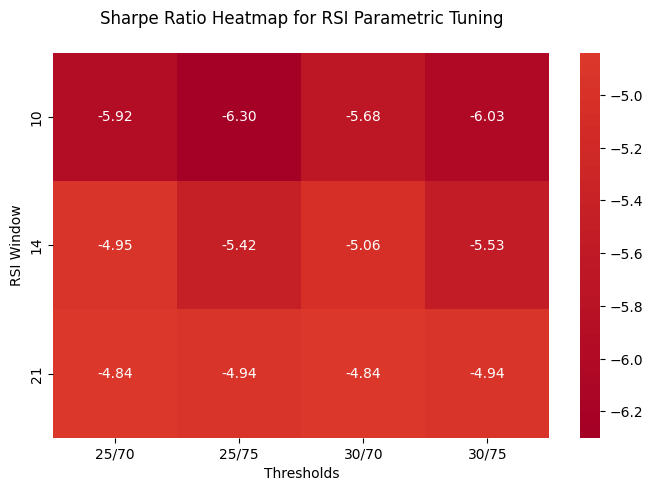

In [58]:
data = {
    'RSI Window': [21, 21, 21, 21, 14, 14, 14, 14, 10, 10, 10, 10],
    'Buy Threshold': [25, 30, 25, 30, 25, 30, 25, 30, 30, 25, 30, 25],
    'Sell Threshold': [70, 70, 75, 75, 70, 70, 75, 75, 70, 70, 75, 75],
    'Final Return (%)': [-70.29, -70.29, -67.37, -67.37, -75.39, -76.38, -76.07, -77.04, -81.01, -81.79, -81.50, -82.27],
    'Sharpe Ratio': [-4.84, -4.84, -4.94, -4.94, -4.95, -5.06, -5.42, -5.53, -5.68, -5.92, -6.03, -6.30]
}

df_tuning = pd.DataFrame(data)

df_tuning['Thresholds'] = df_tuning['Buy Threshold'].astype(str) + '/' + df_tuning['Sell Threshold'].astype(str)

pivot_table = df_tuning.pivot(index='RSI Window', columns='Thresholds', values='Sharpe Ratio')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Sharpe Ratio Heatmap for RSI Parametric Tuning\n")
plt.show()
fig.savefig("images/heatmap_sharpe_ratio.png", dpi=300, bbox_inches='tight')
plt.close()

### **Observations - Sharpe Ratio Heatmap**

- Across most parameter combinations, Sharpe Ratios are negative, indicating poor risk-adjusted performance.
- The least negative Sharpe Ratio values are observed when **RSI window = 21 days**, with thresholds (25, 70) or (30, 70), but still not positive enough to indicate a profitable strategy after accounting for volatility.
- Shorter RSI windows (10 and 14) tend to produce worse Sharpe Ratios, suggesting that the strategy becomes too reactive and suffers from false signals.

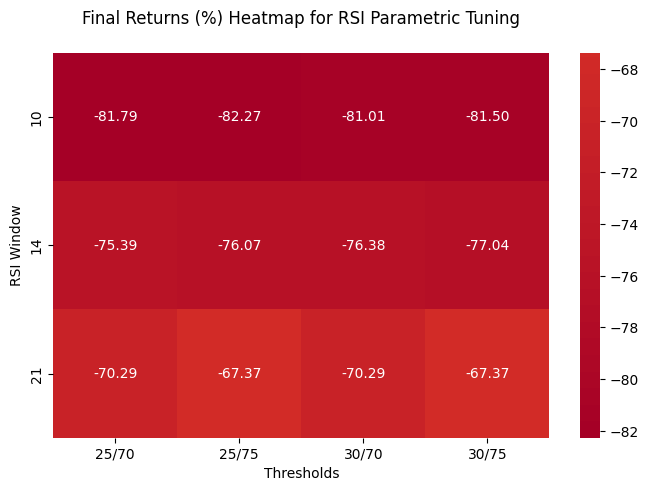

In [59]:
pivot_table_return = df_tuning.pivot(index = 'RSI Window', columns = 'Thresholds', values = 'Final Return (%)')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(pivot_table_return, annot=True, cmap="RdYlGn", center=0, fmt=".2f")
plt.title("Final Returns (%) Heatmap for RSI Parametric Tuning\n")
plt.show()
fig.savefig("images/heatmap_final_returns.png", dpi=300, bbox_inches='tight')
plt.close()

### **Observations - Final Returns (%) Heatmap**

- Final returns are consistently negative for all tested combinations, with losses ranging from **-67%** to **-82%**.
- The best return among the tested parameters is around **-67%**, seen with **RSI window = 21 days** and thresholds (25, 75) or (30, 75).
- Shorter RSI windows (10, 14) result in the largest losses **(around -81% to -82%)**, likely due to excessive sensitivity to short-term price moves.

## **Conclusion**

1. RSI+EMA hybrid strategies offer the best balance of return and risk for Indo Thai Securities.
2. Buy & Hold is safer than standalone RSI, but far less profitable than the hybrid approach.
3. Parameter tuning confirms RSI alone is unreliable.
4. Future work: Test the hybrid strategy on other stocks and simulate a multistock portfolio.

## **Key Insights:**

- Parameter tuning did not identify as a profitable standalone RSI strategy in this dataset for Indo Thai Securities.
- Higher RSI windows (21) reduced losses compared to smaller windows, but still did not achieve profitability.
- The poor results align with earlier findings that RSI alone underperforms compared to **RSI+EMA hybrid** strategies in both returns and drawdown.